In [11]:
import pandas as pd
import re
from collections import Counter
from langdetect import detect
from nltk.corpus import stopwords
from nltk import download
import emoji

# Télécharger les stopwords si besoin
download('stopwords')
stopwords_fr = set(stopwords.words('french'))
stopwords_ar = set(stopwords.words('arabic'))

# Charger les données
df = pd.read_csv("C:/Users/HP/Desktop/morrocan_arabic_individual_labels.csv", encoding='utf-8')

# Étape 1 : colonne final_label par vote majoritaire
def majority_vote(row):
    labels = [row['label_1'], row['label_2'], row['label_3']]
    labels = [label for label in labels if pd.notna(label)]
    if not labels:
        return None
    most_common = Counter(labels).most_common(1)
    return most_common[0][0]

df["final_label"] = df.apply(majority_vote, axis=1)

# Étape 2 : nettoyage des tweets
def clean_text(text):
    text = str(text)
    text = re.sub(r'@\w+', '', text)                       # mentions
    text = re.sub(r'#\w+', '', text)                       # hashtags
    text = re.sub(r'http\S+', '', text)                    # liens
    text = emoji.replace_emoji(text, replace='')           # emojis
    text = re.sub(r'[^\w\s]', '', text)                    # ponctuation
    text = re.sub(r'\d+', '', text)                        # chiffres
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)             # lettres répétées
    text = text.lower().strip()
    return text

df["clean_text"] = df["text"].apply(clean_text)

# Étape 3 : suppression des stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords_fr and word not in stopwords_ar]
    return " ".join(words)

df["clean_text"] = df["clean_text"].apply(remove_stopwords)

# Étape 4 : détection de la langue dominante (optionnel)
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

df["lang"] = df["clean_text"].apply(detect_language)

# Enregistrer le résultat si besoin
df.to_csv("C:/Users/HP/Desktop/tweets_maroc_preprocessed.csv", index=False)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
pip install emoji

   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
    --------------------------------------- 10.2/590.6 kB ? eta -:--:--
   -- ------------------------------------ 30.7/590.6 kB 325.1 kB/s eta 0:00:02
   -- ------------------------------------ 41.0/590.6 kB 217.9 kB/s eta 0:00:03
   ---- ---------------------------------- 61.4/590.6 kB 297.7 kB/s eta 0:00:02
   ------- ------------------------------ 112.6/590.6 kB 409.6 kB/s eta 0:00:02
   ------- ------------------------------ 112.6/590.6 kB 409.6 kB/s eta 0:00:02
   ------- ------------------------------ 122.9/590.6 kB 327.4 kB/s eta 0:00:02
   ------------ ------------------------- 194.6/590.6 kB 454.0 kB/s eta 0:00:01
   ---------------- --------------------- 256.0/590.6 kB 542.5 kB/s eta 0:00:01
   

In [15]:
import pandas as pd
import re
from collections import Counter
from langdetect import detect
from nltk.corpus import stopwords
from nltk import download
import emoji

# 🔸 Télécharger les stopwords
download('stopwords')
stopwords_fr = set(stopwords.words('french'))
stopwords_ar = set(stopwords.words('arabic'))

# 🔹 Charger les données (chemin vers ton bureau)
df = pd.read_csv("C:/Users/HP/Desktop/morrocan_arabic_individual_labels.csv", encoding='utf-8')

# 🔹 Étape 1 : label final par vote majoritaire
def majority_vote(row):
    labels = [row['label_1'], row['label_2'], row['label_3']]
    labels = [label for label in labels if pd.notna(label)]
    if not labels:
        return None
    return Counter(labels).most_common(1)[0][0]

df["final_label"] = df.apply(majority_vote, axis=1)

# 🔹 Étape 2 : translittération arabizi vers lettres latines
def arabizi_to_latin(text):
    replacements = {
        '7': 'h',
        '3': 'a',
        '9': 'q',
        '5': 'kh',
        '6': 't',
        '8': 'gh',
        '2': 'a',
    }
    for number, letter in replacements.items():
        text = re.sub(number, letter, text)
    return text

# 🔹 Étape 3 : nettoyage des tweets
def clean_text(text):
    text = str(text)
    text = re.sub(r'@\w+', '', text)                     # mentions
    text = re.sub(r'#\w+', '', text)                     # hashtags
    text = re.sub(r'http\S+', '', text)                  # liens
    text = emoji.replace_emoji(text, replace='')         # emojis
    text = re.sub(r'[^\w\s]', '', text)                  # ponctuation
    text = re.sub(r'\b\d+\b', '', text)                  # chiffres isolés (ex: 2023)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)           # lettres répétées
    text = text.lower().strip()
    return text

# 🔹 Étape 4 : suppression des stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords_fr and word not in stopwords_ar]
    return " ".join(words)

# 🔹 Étape 5 : détection de langue
def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown"

# 🔹 Pipeline complet
df["clean_text"] = df["text"].apply(clean_text)
df["clean_text"] = df["clean_text"].apply(arabizi_to_latin)
df["clean_text"] = df["clean_text"].apply(remove_stopwords)
df["lang"] = df["clean_text"].apply(detect_language)
# 1. On garde uniquement les tweets avec un label clair (pas vide, pas indeterminate)
df = df[df['final_label'].notna()]
df = df[df['final_label'].str.lower() != 'indeterminate']

# 2. On met les tweets non annotés de côté (pour les exploiter plus tard si besoin)
unlabeled_df = df[df['final_label'].isna()]
unlabeled_df.to_csv("C:/Users/HP/Desktop/tweets_maroc_non_annotes.csv", index=False)

# 🔹 Enregistrer le nouveau fichier
df.to_csv("C:/Users/HP/Desktop/tweets_maroc_preprocessed2.csv", index=False)
print("✅ Fichier nettoyé enregistré sur le bureau.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Fichier nettoyé enregistré sur le bureau.


In [29]:
import pandas as pd
import re
from collections import Counter
from langdetect import detect
from nltk.corpus import stopwords
from nltk import download
import emoji

# 🔸 Télécharger les stopwords
download('stopwords')
stopwords_fr = set(stopwords.words('french'))
stopwords_ar = set(stopwords.words('arabic'))

# 🔹 Étape 1 : réparer le fichier encodé en latin1
with open("C:/Users/HP/Desktop/morrocan_arabic_individual_labels.csv", "r", encoding="latin1") as f:
    lines = f.readlines()

lines = [line.encode('latin1').decode('utf-8', errors='replace') for line in lines]

with open("C:/Users/HP/Desktop/morrocan_fixed.csv", "w", encoding="utf-8") as f:
    f.writelines(lines)

# 🔹 Étape 2 : charger le fichier réparé
df = pd.read_csv("C:/Users/HP/Desktop/morrocan_fixed.csv")

# 🔹 Étape 3 : vote majoritaire
def majority_vote(row):
    labels = [row['label_1'], row['label_2'], row['label_3']]
    labels = [label for label in labels if pd.notna(label)]
    if not labels:
        return None
    return Counter(labels).most_common(1)[0][0]

df["final_label"] = df.apply(majority_vote, axis=1)

# 🔹 Étape 4 : translittération arabizi → lettres latines
def arabizi_to_latin(text):
    replacements = {
        '7': 'h',
        '3': 'a',
        '9': 'q',
        '5': 'kh',
        '6': 't',
        '8': 'gh',
        '2': 'a',
    }
    for number, letter in replacements.items():
        text = re.sub(number, letter, text)
    return text

# 🔹 Étape 5 : nettoyage du texte
def clean_text(text):
    text = str(text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = emoji.replace_emoji(text, replace='')
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\b\d+\b', '', text)
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    text = text.lower().strip()
    return text

# 🔹 Étape 6 : suppression des stopwords
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords_fr and word not in stopwords_ar]
    return " ".join(words)

# 🔹 Pipeline complet
df["clean_text"] = df["text"].apply(clean_text)
df["clean_text"] = df["clean_text"].apply(arabizi_to_latin)
df["clean_text"] = df["clean_text"].apply(remove_stopwords)

# 🔹 Séparer données annotées / non annotées
df_annotated = df[df['final_label'].notna()]
df_annotated = df_annotated[df_annotated['final_label'].str.lower() != 'indeterminate']
df_annotated = df_annotated[["clean_text", "final_label"]]

df_unlabeled = df[df['final_label'].isna()]
df_unlabeled = df_unlabeled[["clean_text"]]

# 🔹 Sauvegarde
df_annotated.to_csv("C:/Users/HP/Desktop/tweets_maroc_preprocessed_final.csv", index=False)
df_unlabeled.to_csv("C:/Users/HP/Desktop/tweets_maroc_non_annotes.csv", index=False)

print("✅ Fichiers enregistrés sur le bureau :")
print(" - tweets_maroc_preprocessed_final.csv (avec labels)")
print(" - tweets_maroc_non_annotes.csv (sans labels)")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Fichiers enregistrés sur le bureau :
 - tweets_maroc_preprocessed_final.csv (avec labels)
 - tweets_maroc_non_annotes.csv (sans labels)


In [35]:
import pandas as pd

# 🔹 Chemin du fichier .txt à convertir
txt_path = "C:/Users/HP/Desktop/tweets_maroc_preprocessed_final1.txt"

# 🔹 Lire le fichier texte avec la première ligne comme en-tête
df = pd.read_csv(txt_path, sep=",", encoding="utf-8")

# 🔹 Vérification : afficher les premières lignes
print("✅ Aperçu des données :")
print(df.head())

# 🔹 Sauvegarder en CSV avec encodage compatible Excel et caractères spéciaux
output_csv = "C:/Users/HP/Desktop/tweets_maroc_preprocessed_final1.csv"
df.to_csv(output_csv, index=False, encoding="utf-8-sig")

print(f"\n✅ Fichier CSV enregistré avec succès ici : {output_csv}")


✅ Aperçu des données :
                                          clean_text final_label
0  jomoaa mobaraka inchallah aliya we ala famille...    Positive
1  daba homa li ghadi ykhtaro hna khas nsdaohom b...     Neutral
2  matbkhlich alina wakha maart fin katiho ala ha...     Neutral
3           o soltana fella waadat ibtissam boghniya     Neutral
4  ihaab nta tstaleel laqab o nta charaftii maghr...    Positive

✅ Fichier CSV enregistré avec succès ici : C:/Users/HP/Desktop/tweets_maroc_preprocessed_final1.csv


In [51]:
import pandas as pd
import re
import emoji
from nltk.corpus import stopwords
from nltk import download

# 🔹 Télécharger les stopwords arabes et français
download('stopwords')
stopwords_ar = set(stopwords.words('arabic'))
stopwords_fr = set(stopwords.words('french'))

# 🔹 Étape 1 : translittération Arabizi → lettres latines
def arabizi_to_latin(text):
    replacements = {
        '7': 'h',
        '3': 'a',
        '9': 'q',
        '5': 'kh',
        '6': 't',
        '8': 'gh',
        '2': 'a',
    }
    for number, letter in replacements.items():
        text = re.sub(number, letter, text)
    return text

def is_arabizi(text):
    return any(char in text for char in "2375689")

# 🔹 Nettoyage des textes arabes
def clean_arabic_text(text):
    text = str(text)
    text = emoji.replace_emoji(text, replace='')                     # Supprimer emojis
    text = re.sub(r'@?user\b', '', text, flags=re.IGNORECASE)        # Supprimer @user ou user
    text = re.sub(r'#\w+', '', text)                                 # Hashtags
    text = re.sub(r'http\S+', '', text)                              # Liens
    text = re.sub(r'[a-zA-Z]', '', text)                             # Lettres latines
    text = re.sub(r'\d+', '', text)                                  # Chiffres
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)                   # Caractères non arabes
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)                        # Répétitions
    text = re.sub(r'\s+', ' ', text).strip()                         # Espaces
    return text

# 🔹 Nettoyage des textes latins
def clean_latin_text(text):
    text = str(text)
    text = emoji.replace_emoji(text, replace='')                     # Supprimer emojis
    text = re.sub(r'@?user\b', '', text, flags=re.IGNORECASE)        # Supprimer @user ou user
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)                        # Répétitions
    text = re.sub(r'\d+', '', text)                                  # Chiffres
    text = re.sub(r'[^\w\s]', '', text)                              # Ponctuation
    text = re.sub(r'\s+', ' ', text).strip().lower()                 # Espaces et lowercase
    return text

# 🔹 Suppression des stopwords
def remove_arabic_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords_ar]
    return " ".join(words)

def remove_latin_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stopwords_fr]
    return " ".join(words)

# 🔹 Détection de langue et traitement global
def detect_and_clean_text(text):
    text = str(text)
    if re.search(r'[\u0600-\u06FF]', text):  # Lettres arabes
        cleaned = clean_arabic_text(text)
        return remove_arabic_stopwords(cleaned), "arabe"
    elif is_arabizi(text):  # Chiffres typiques Arabizi
        text = arabizi_to_latin(text)
        text = clean_latin_text(text)
        return remove_latin_stopwords(text), "latin"
    else:  # Latin pur
        text = clean_latin_text(text)
        return remove_latin_stopwords(text), "latin"

# 🔹 Traitement des fichiers Darija (arabe/arabizi)
def process_darija_file(filepath, pays):
    df = pd.read_csv(filepath, sep="\t", names=["clean_text", "final_label"], encoding="utf-8")
    cleaned_texts = []
    source_langs = []
    for text in df["clean_text"]:
        cleaned, lang = detect_and_clean_text(text)
        cleaned_texts.append(cleaned)
        source_langs.append(lang)
    df["clean_text"] = cleaned_texts
    df["source_langue"] = source_langs
    df["pays"] = pays
    return df

# 🔹 Traitement du fichier latin uniquement
def process_latin_file(filepath):
    df = pd.read_csv(filepath, encoding="utf-8")
    df = df[["clean_text", "final_label"]]
    cleaned_texts = []
    source_langs = []
    for text in df["clean_text"]:
        cleaned, lang = detect_and_clean_text(text)
        cleaned_texts.append(cleaned)
        source_langs.append(lang)
    df["clean_text"] = cleaned_texts
    df["source_langue"] = source_langs
    df["pays"] = "maroc"
    return df

# 🔹 Fichiers à traiter
files = [
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/arq/train.tsv", "algerie"),
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/arq/dev.tsv", "algerie"),
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/arq/test.tsv", "algerie"),
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/ary/train.tsv", "maroc"),
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/ary/dev.tsv", "maroc"),
    ("C:/Users/HP/Desktop/projet_nlp/data_projet_nlp/ary/test.tsv", "maroc")
]

# 🔹 Traitement
arabic_dfs = [process_darija_file(path, pays) for path, pays in files]
latin_df = process_latin_file("C:/Users/HP/Desktop/tweets_maroc_preprocessed_final1.csv")

# 🔹 Fusion finale
df_all = pd.concat(arabic_dfs + [latin_df], ignore_index=True)

# 🔹 Sauvegarde
output_path = "C:/Users/HP/Desktop/darija_dataset_fusionne_final3.csv"
df_all.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"✅ Dataset final fusionné et nettoyé enregistré ici : {output_path}")
print(df_all.sample(5))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ Dataset final fusionné et nettoyé enregistré ici : C:/Users/HP/Desktop/darija_dataset_fusionne_final3.csv
                                              clean_text final_label  \
14772  iwa siri qalbi raki nayma o aarfa walo o hadak...    Negative   
14337  hello its baghi nqolik chi hadera wach katssem...    Positive   
3748   laa bssah hada maghribi ahyanari chhal hna waarin    positive   
13918  salut lolo pliz ghani chanson désolé bghit nas...    Positive   
9427      أشرف حكيمي فرحان غادي يلعب فالمونديال مرة أخرى     neutral   

      source_langue   pays  
14772         latin  maroc  
14337         latin  maroc  
3748          latin  maroc  
13918         latin  maroc  
9427          arabe  maroc  


In [53]:
import pandas as pd

# 🔹 Chemin du fichier
filepath = "C:/Users/HP/Desktop/darija_dataset_fusionne_final3.csv"

# 🔹 Chargement du fichier
df = pd.read_csv(filepath, encoding="utf-8-sig")

# 🔹 Suppression des lignes où la première colonne contient exactement "tweet"
df = df[df["clean_text"].str.lower() != "tweet"]

# 🔹 Sauvegarde dans le même fichier
df.to_csv(filepath, index=False, encoding="utf-8-sig")

print("✅ Lignes contenant uniquement 'tweet' supprimées avec succès.")


✅ Lignes contenant uniquement 'tweet' supprimées avec succès.



🔄 Nouvelle distribution des classes après correction :
final_label
negative    6232
neutral     5725
positive    5425
Name: count, dtype: int64

📊 Pourcentage par classe :
final_label
negative    35.853181
neutral     32.936371
positive    31.210448
Name: proportion, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_1808\3012803274.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='final_label', order=df['final_label'].value_counts().index, palette='Set2')


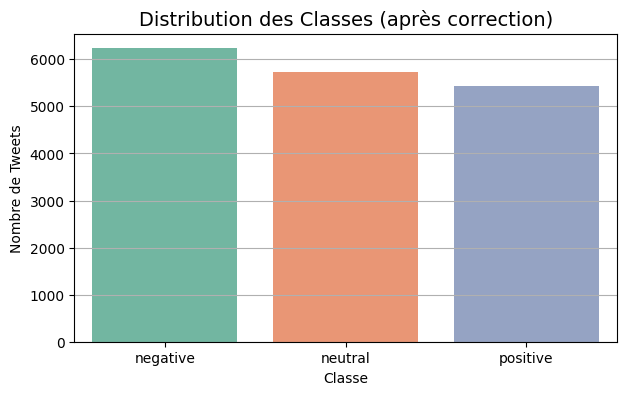

In [57]:
# 🔹 Corriger les doublons de casse dans les labels
df['final_label'] = df['final_label'].str.lower()

# 🔹 Recompter la distribution après correction
print("\n🔄 Nouvelle distribution des classes après correction :")
print(df['final_label'].value_counts())
print("\n📊 Pourcentage par classe :")
print(df['final_label'].value_counts(normalize=True) * 100)

# 🔹 Affichage graphique mis à jour
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sns.countplot(data=df, x='final_label', order=df['final_label'].value_counts().index, palette='Set2')
plt.title("Distribution des Classes (après correction)", fontsize=14)
plt.xlabel("Classe")
plt.ylabel("Nombre de Tweets")
plt.grid(axis='y')
plt.show()


In [59]:
# 🔹 Sauvegarde du dataset corrigé
output_path = "C:/Users/HP/Desktop/darija_dataset_fusionne_cleaned.csv"
df.to_csv(output_path, index=False, encoding='utf-8-sig')
print(f"✅ Dataset nettoyé sauvegardé ici : {output_path}")


✅ Dataset nettoyé sauvegardé ici : C:/Users/HP/Desktop/darija_dataset_fusionne_cleaned.csv


In [1]:
pip install datasets pandas

   ---------------------------------------- 0.0/491.5 kB ? eta -:--:--
    --------------------------------------- 10.2/491.5 kB ? eta -:--:--
   -- ------------------------------------ 30.7/491.5 kB 330.3 kB/s eta 0:00:02
   ----- --------------------------------- 71.7/491.5 kB 660.6 kB/s eta 0:00:01
   ------- ------------------------------ 102.4/491.5 kB 590.8 kB/s eta 0:00:01
   -------------- ----------------------- 184.3/491.5 kB 857.5 kB/s eta 0:00:01
   --------------------- ------------------ 266.2/491.5 kB 1.0 MB/s eta 0:00:01
   -------------------------- ------------- 327.7/491.5 kB 1.1 MB/s eta 0:00:01
   -------------------------------- ------- 399.4/491.5 kB 1.1 MB/s eta 0:00:01
   ------------------------------------- -- 460.8/491.5 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  491.5/491.5 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 491.5/491.5 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/146.7 kB 